# Leer Archivos XY exportados de SPECSLAB Prodigy

In [1]:
# --- OS ----------------------------------------------------------------------
import os 
# for details see https://thomas-cokelaer.info/tutorials/python/module_os.html

# --- matplotlib --------------------------------------------------------------
import matplotlib.pyplot as plt

# --- Numpy -------------------------------------------------------------------
import numpy as np

# --- Pandas ------------------------------------------------------------------
#import pandas as pd

# --- LMFIT -------------------------------------------------------------------
from lmfit import Parameters, minimize, report_fit
from lmfit.models import ConstantModel, GaussianModel, LinearModel, VoigtModel
from lmfit import Parameters, CompositeModel, Model

# --- scipy -------------------------------------------------------------------
from scipy.special import wofz


# --- Our own modules ---------------------------------------------------------
import sys
#sys.path.insert(0, '/home/julio/Python/XPS_Python/paquetes_funciones/') # Julio Laptop
sys.path.insert(0, '/Users/ceciliapatrault/Desktop/Julio/XPS_PYTHON/paquetes_funciones') # Mac
import specs_xy as sp
import fitxps as fitxps
#from fitxps import *
import xpspy as xpspy

In [2]:
files_path = "data/separated/"

archivos = sp.list_files_xy(files_path)

print(archivos)

data/separated/
['data/separated/Au_MeMBA_5min_10_Survey (0).xy', 'data/separated/Au_MeMBA_5min_11_S (0).xy', 'data/separated/Au_MeMBA_5min_12_C (0).xy', 'data/separated/Au_MeMBA_5min_13_Au (0).xy', 'data/separated/Au_MeMBA_5min_14_VB (0).xy', 'data/separated/Au_MeMBA_5min_15_O (0).xy', 'data/separated/Au_MeMBA_5min_16_S (1).xy', 'data/separated/Au_MeMBA_5min_17_C (1).xy', 'data/separated/Au_MeMBA_5min_18_Au (1).xy', 'data/separated/Au_MeMBA_5min_19_VB (1).xy', 'data/separated/Au_MeMBA_5min_20_O (1).xy', 'data/separated/Au_MeMBA_5min_21_S (2).xy', 'data/separated/Au_MeMBA_5min_22_C (2).xy', 'data/separated/Au_MeMBA_5min_23_Au (2).xy', 'data/separated/Au_MeMBA_5min_24_VB (2).xy', 'data/separated/Au_MeMBA_5min_25_O (2).xy', 'data/separated/Au_MeMBA_5min_26_S (3).xy', 'data/separated/Au_MeMBA_5min_27_C (3).xy', 'data/separated/Au_MeMBA_5min_28_Au (3).xy', 'data/separated/Au_MeMBA_5min_29_VB (3).xy', 'data/separated/Au_MeMBA_5min_30_O (3).xy', 'data/separated/Au_MeMBA_5min_31_Spectrum.xy']

In [3]:
S_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_11_S (0).xy')
survey = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_10_Survey (0).xy')
VB_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_14_VB (0).xy')
Au_0 = sp.load_one_file_xy('data/separated/Au_MeMBA_5min_13_Au (0).xy')

In [4]:
S_0.keys()

dict_keys(['details', 'data_orig'])

In [5]:
S_0

{'details': {'Region': 'S (0)',
  'Acquisition Date': '06/10/22 18:06:02 UTC',
  'Analysis Method': 'XPS',
  'Analyzer Lens': 'MediumArea:3.5kV',
  'Analyzer Slit': '5:7x20\\B:open',
  'Scan Mode': 'FixedAnalyzerTransmission',
  'Curves/Scan': 1,
  'Values/Curve': 181,
  'Dwell Time': 0.1,
  'Excitation Energy': 1486.71,
  'Binding Energy': 168.0,
  'Pass Energy': 20.0,
  'Bias Voltage': 90.0,
  'Detector Voltage': 1750.0,
  'Eff. Workfunction': 4.341,
  'Source': 'Focus',
  'Comment': 'sin irradiar',
  'Number of Scans': 30},
 'data_orig': {'BE': array([-168.  , -167.95, -167.9 , -167.85, -167.8 , -167.75, -167.7 ,
         -167.65, -167.6 , -167.55, -167.5 , -167.45, -167.4 , -167.35,
         -167.3 , -167.25, -167.2 , -167.15, -167.1 , -167.05, -167.  ,
         -166.95, -166.9 , -166.85, -166.8 , -166.75, -166.7 , -166.65,
         -166.6 , -166.55, -166.5 , -166.45, -166.4 , -166.35, -166.3 ,
         -166.25, -166.2 , -166.15, -166.1 , -166.05, -166.  , -165.95,
         -165.9 

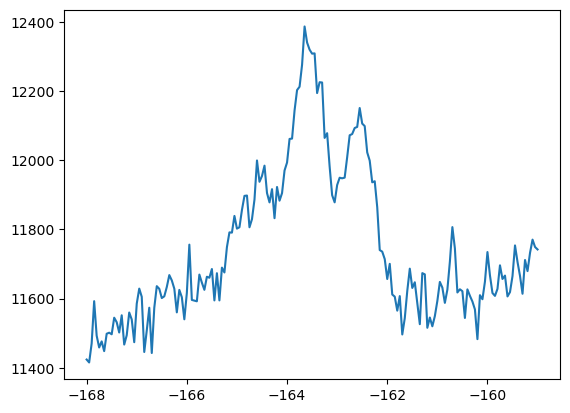

In [6]:
plt.plot(S_0['data_orig']['BE'],S_0['data_orig']['intensity'])

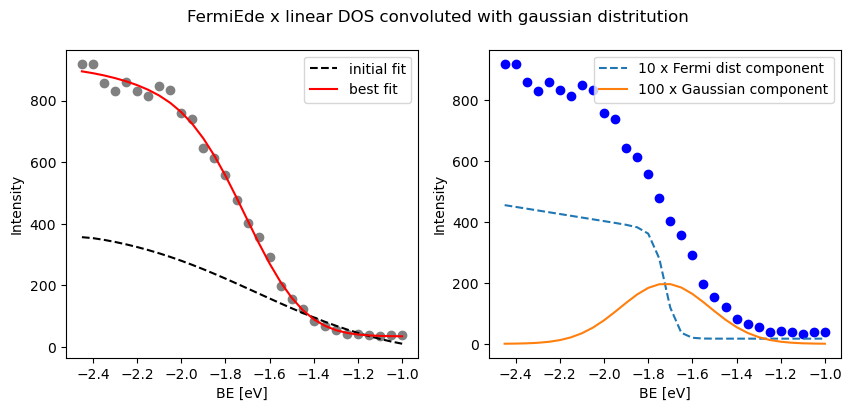

[[Model]]
    (Model(FL_LDOS, prefix='FL_') <function convolve at 0x7f84c44e1e50> Model(gaussian_normalized, prefix='g_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 30
    # variables        = 5
    chi-square         = 9885.28329
    reduced chi-square = 395.411332
    Akaike info crit   = 183.928150
    Bayesian info crit = 190.934137
[[Variables]]
    FL_m:      -11.6856150 +/- 4.92306094 (42.13%) (init = -1)
    FL_b:       35.3817928 +/- 3.17170091 (8.96%) (init = 20)
    FL_c:       1.69405321 +/- 0.42040235 (24.82%) (init = 0)
    FL_center: -1.72315753 +/- 0.00943632 (0.55%) (init = -1.7)
    FL_T:       300 (fixed)
    g_center:  -1.72315753 +/- 0.00943632 (0.55%) == 'FL_center'
    g_gw:       0.20202337 +/- 0.01712914 (8.48%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(FL_m, FL_b)      = 0.980
    C(FL_m, FL_center) = -0.918
    C(FL_b, FL_center) = -0.912
    C(FL_b, g_gw)      = 0.

In [7]:
fitxps.FermiEdge(VB_0,'BE',-2.5,-1,0,20,-1,300,0.5,-1.7)

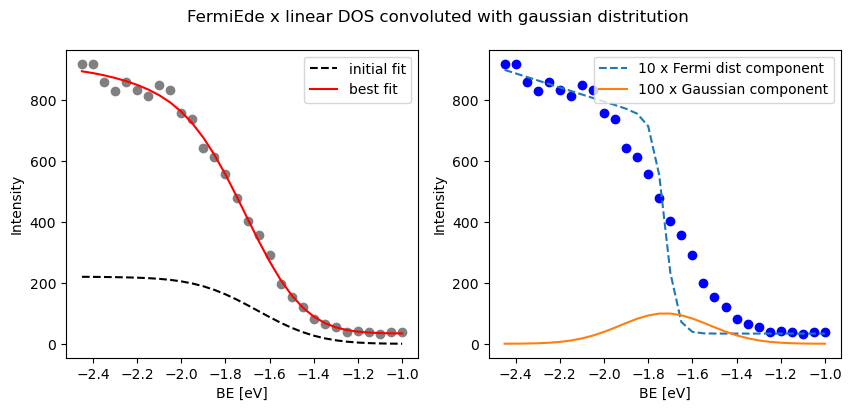

[[Model]]
    (Model(FL_LDOS, prefix='FL_') <function convolve at 0x7f84c44e1e50> Model(gn, prefix='g_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 30
    # variables        = 5
    chi-square         = 9885.28329
    reduced chi-square = 395.411332
    Akaike info crit   = 183.928150
    Bayesian info crit = 190.934137
[[Variables]]
    FL_m:      -23.0781333 +/- 11.2922821 (48.93%) (init = -1)
    FL_b:       69.8696277 +/- 3.42453153 (4.90%) (init = 20)
    FL_c:       3.34544014 +/- 1.00622631 (30.08%) (init = 0)
    FL_center: -1.72315588 +/- 0.00943754 (0.55%) (init = -1.7)
    FL_T:       300 (fixed)
    g_center:  -1.72315588 +/- 0.00943754 (0.55%) == 'FL_center'
    g_gw:       0.47572032 +/- 0.04025148 (8.46%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(FL_m, FL_center) = -0.917
    C(FL_m, g_gw)      = 0.834
    C(FL_center, g_gw) = -0.728
    C(FL_c, g_gw)      = -0.708
    C(FL_m, 

In [8]:
fitxps.FermiEdge_gn(VB_0,'BE',-2.5,-1,0,20,-1,300,0.5,-1.7)

In [9]:
fitxps.Energy_Corr_one(S_0,-1.72)

In [10]:
S_0.keys()

dict_keys(['details', 'data_orig', 'data_corr'])

In [11]:
print(type(S_0['data_corr']),type(S_0['data_corr']['BE']),type(S_0['data_corr']['BE'][0]))

<class 'dict'> <class 'numpy.ndarray'> <class 'numpy.float64'>


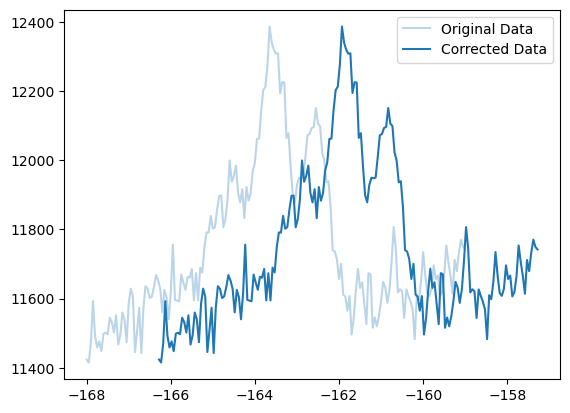

In [12]:
plt.plot(S_0['data_orig']['BE'],S_0['data_orig']['intensity'], label='Original Data', alpha=0.3, color='C0')
plt.plot(S_0['data_corr']['BE'],S_0['data_orig']['intensity'], label='Corrected Data', color='C0')
plt.legend()

In [13]:
type(S_0['data_corr']['BE'])

numpy.ndarray

In [14]:
region = S_0

#energy_scale = 'BE'
#xmin = -166
#xmax = -157

sos = 1.18


fitxps.range_to_fit(region,'BE',-166,-157)


In [15]:
S_0.keys()
# S_0['data_to_fit'].keys()

dict_keys(['details', 'data_orig', 'data_corr', 'data_to_fit'])

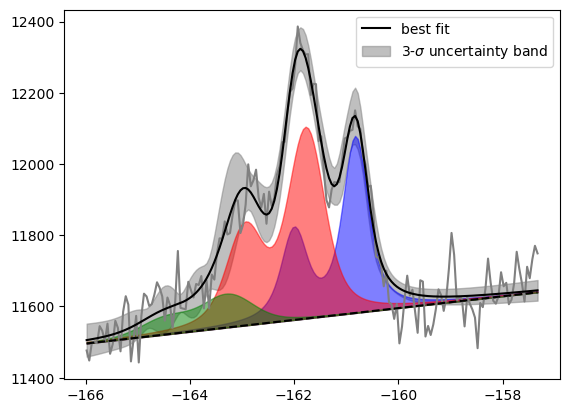

[[Model]]
    (((Model(linear, prefix='bkgl_') + Model(dvnp, prefix='pS1_')) + Model(dvnp, prefix='pS2_')) + Model(dvnp, prefix='pS3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 319
    # data points      = 174
    # variables        = 11
    chi-square         = 529926.755
    reduced chi-square = 3251.08439
    Akaike info crit   = 1417.73035
    Bayesian info crit = 1452.47996
[[Variables]]
    bkgl_slope:      16.6137307 +/- 2.38377215 (14.35%) (init = 28.91243)
    bkgl_intercept:  14253.7240 +/- 381.519682 (2.68%) (init = 16280.26)
    pS1_sos:         1.18 (fixed)
    pS1_amplitude:   402.789522 +/- 26.9943741 (6.70%) (init = 11000)
    pS1_sigma:       0.13968651 +/- 0.02784181 (19.93%) (init = 0.2)
    pS1_gamma:       0.2 (fixed)
    pS1_center:     -160.824411 +/- 0.01849862 (0.01%) (init = -161)
    pS2_sos:         1.18 (fixed)
    pS2_amplitude:   566.711097 +/- 33.1614238 (5.85%) (init = 12000)
    pS2_sigma:       0.25305025 +/- 0.027

In [16]:

x = region['data_to_fit']['x']
y = region['data_to_fit']['y']

#calculate slope and intercept for linear background as initial pars value from the extremes of data
xa=np.mean(x[:5])
xb=np.mean(x[-5:])
ya=np.mean(y[:5])
yb=np.mean(y[-5:])

m = (yb-ya)/(xb-xa)
c = ya - m*xa

bkgl = LinearModel(independent_vars=['x'], prefix='bkgl_')

pS1 = Model(fitxps.dvnp, independent_vars=['x'], prefix='pS1_')
pS2 = Model(fitxps.dvnp,independent_vars=['x'], prefix='pS2_')
pS3 = Model(fitxps.dvnp,independent_vars=['x'], prefix='pS3_')

mod = bkgl + pS1 + pS2 + pS3


pars = mod.make_params()



pars['bkgl_intercept'].set(value=c)
pars['bkgl_slope'].set(value=m)


pars['pS1_sos'].set(value=sos, vary=False)
pars['pS1_gamma'].set(value=0.2, vary=False)
pars['pS1_sigma'].set(value=0.2, min=0.1, max=0.8)
pars['pS1_amplitude'].set(value=11000)
pars['pS1_center'].set(value=-161, min=-161.7, max=-160)

pars['pS2_sos'].set(value=sos, vary=False)
pars['pS2_gamma'].set(value=0.2, vary=False)
pars['pS2_sigma'].set(value=0.2, min=0.1, max=0.8)
pars['pS2_amplitude'].set(value=12000)
pars['pS2_center'].set(value=-162, min=-162.7, max=-161.7)

pars['pS3_sos'].set(value=sos, vary=False)
pars['pS3_gamma'].set(value=0.2, vary=False)
pars['pS3_sigma'].set(value=0.2, min=0.1, max=0.4)
pars['pS3_amplitude'].set(value=5000)
pars['pS3_center'].set(value=-163.4, min=-163.8, max=-162.7)

# fit this model to data array y
result = mod.fit(y, params=pars, x=x)

# eval uncertainty
dely = result.eval_uncertainty(sigma=3)

# generate components
comps = result.eval_components(x=x)

comp_bkgl = comps['bkgl_']
comp_S1 = comps['pS1_'] + comp_bkgl
comp_S2 = comps['pS2_'] + comp_bkgl
comp_S3 = comps['pS3_'] + comp_bkgl

# plot results
#fig, axes = plt.subplots(1, 2, figsize=(10,4))

plt.plot(x, y, '-', color='grey')
#axes[0].plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'k-', label='best fit')

plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.5,
                 label='3-$\sigma$ uncertainty band')

plt.fill_between(x,comp_S1,comp_bkgl, color='blue', alpha=0.5)
plt.fill_between(x,comp_S2,comp_bkgl, color='red', alpha=0.5)
plt.fill_between(x,comp_S3,comp_bkgl, color='green', alpha=0.5)
plt.plot(x,comp_bkgl, '--', color='black')

#axes[0].set_xlabel(energy_scale + ' [eV]')
#axes[0].set_ylabel('Intensity')
plt.legend()



# fig.suptitle(
#    'FermiEde x linear DOS convoluted with gaussian distritution'
#    )

plt.show()

print(result.fit_report())


In [17]:
type(pars)

lmfit.parameter.Parameters

In [18]:
region = S_0

sos = 1.18

fitxps.range_to_fit(region,'BE',-166,-157)

fitxps.background_lineal(region)

fitxps.define_voigt_peak_parameters(region,'S1',sos,10000,0.2,0.3,-161)
fitxps.define_voigt_peak_parameters(region,'S2',sos,10000,0.2,0.3,-162)
fitxps.define_voigt_peak_parameters(region,'S3',sos,2000,0.2,0.3,-163)


TypeError: set_param_hint() takes 2 positional arguments but 4 were given

In [ ]:
S_0.keys()

In [ ]:
S_0['params']['pars']

In [ ]:
mod = bkgl + S1 + S2 + S3


# fit this model to data array y
result = mod.fit(y, params=region['params'], x=x)

# eval uncertainty
dely = result.eval_uncertainty(sigma=3)

# generate components
#comps = result.eval_components(x=x)
#
#comp_bkgl = comps['bkgl_']
#comp_S1 = comps['p1_'] + comp_bkgl
#comp_S2 = comps['p2_'] + comp_bkgl
#comp_S3 = comps['p3_'] + comp_bkgl
#
## plot results
##fig, axes = plt.subplots(1, 2, figsize=(10,4))
#
#plt.plot(x, y, '-', color='grey')
##axes[0].plot(x, result.init_fit, 'k--', label='initial fit')
#plt.plot(x, result.best_fit, 'k-', label='best fit')
#
#plt.fill_between(x, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.5,
#                 label='3-$\sigma$ uncertainty band')
#
#plt.fill_between(x,comp_S1,comp_bkgl, color='blue', alpha=0.5)
#plt.fill_between(x,comp_S2,comp_bkgl, color='red', alpha=0.5)
#plt.fill_between(x,comp_S3,comp_bkgl, color='green', alpha=0.5)
#plt.plot(x,comp_bkgl, '--', color='black')
#
##axes[0].set_xlabel(energy_scale + ' [eV]')
##axes[0].set_ylabel('Intensity')
#plt.legend()
#
#
#
#fig.suptitle(
#    'FermiEde x linear DOS convoluted with gaussian distritution'
#    )
#plt.show()

print(result.fit_report())